# Breast Cancer — Binary Classification
Comparing Logistic Regression, SVM, and KNN models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay
)

## 1. Load Dataset

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

print('Dataset shape:', X.shape)
print('Classes:', data.target_names)
print('Class distribution:', dict(zip(*np.unique(y, return_counts=True))))

Dataset shape: (569, 30)
Classes: ['malignant' 'benign']
Class distribution: {np.int64(0): np.int64(212), np.int64(1): np.int64(357)}


## 2. Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Training size:', X_train.shape[0])
print('Test size:', X_test.shape[0])

Training size: 455
Test size: 114


## 3. Model Training

In [17]:
# Logistic Regression — default parameters
lr1 = LogisticRegression(random_state=42)
lr1.fit(X_train, y_train)

# Logistic Regression — increased max_iter to ensure convergence without feature scaling
lr2 = LogisticRegression(max_iter=1000, random_state=42)
lr2.fit(X_train, y_train)

# Logistic Regression — increased max_iter to ensure convergence without feature scaling
lr3 = LogisticRegression(max_iter=10000, random_state=42)
lr3.fit(X_train, y_train)


# SVM — default parameters
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# KNN — default parameters
knn5 = KNeighborsClassifier()
knn5.fit(X_train, y_train)

# KNN — K =3
knn3 = KNeighborsClassifier(3)
knn3.fit(X_train, y_train)

# KNN — K =7
knn7 = KNeighborsClassifier(7)
knn7.fit(X_train, y_train)

print('All models trained successfully.')

All models trained successfully.


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
 

## 4. Model Evaluation

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'Model':     name,
        'Accuracy':  round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall':    round(recall_score(y_test, y_pred), 4),
        'F1-Score':  round(f1_score(y_test, y_pred), 4),
    }, y_pred

results = []
preds   = {}

for name, model in [('Logistic Regression - default iteration', lr1), ('Logistic Regression - 1000 Iteration', lr2), ('Logistic Regression- 10000 Iteration', lr3), ('SVM', svm),('KNN k=5', knn5), ('KNN k=3', knn3), ('KNN k=7', knn7) ]:
    metrics, y_pred = evaluate_model(name, model, X_test, y_test)
    results.append(metrics)
    preds[name] = y_pred

results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

                                         Accuracy  Precision  Recall  F1-Score
Model                                                                         
Logistic Regression - default iteration    0.9561     0.9467  0.9861    0.9660
Logistic Regression - 1000 Iteration       0.9561     0.9589  0.9722    0.9655
Logistic Regression- 10000 Iteration       0.9649     0.9595  0.9861    0.9726
SVM                                        0.9298     0.9211  0.9722    0.9459
KNN k=5                                    0.9123     0.9429  0.9167    0.9296
KNN k=3                                    0.9298     0.9444  0.9444    0.9444
KNN - k=7                                  0.9298     0.9444  0.9444    0.9444


### Confusion Matrices

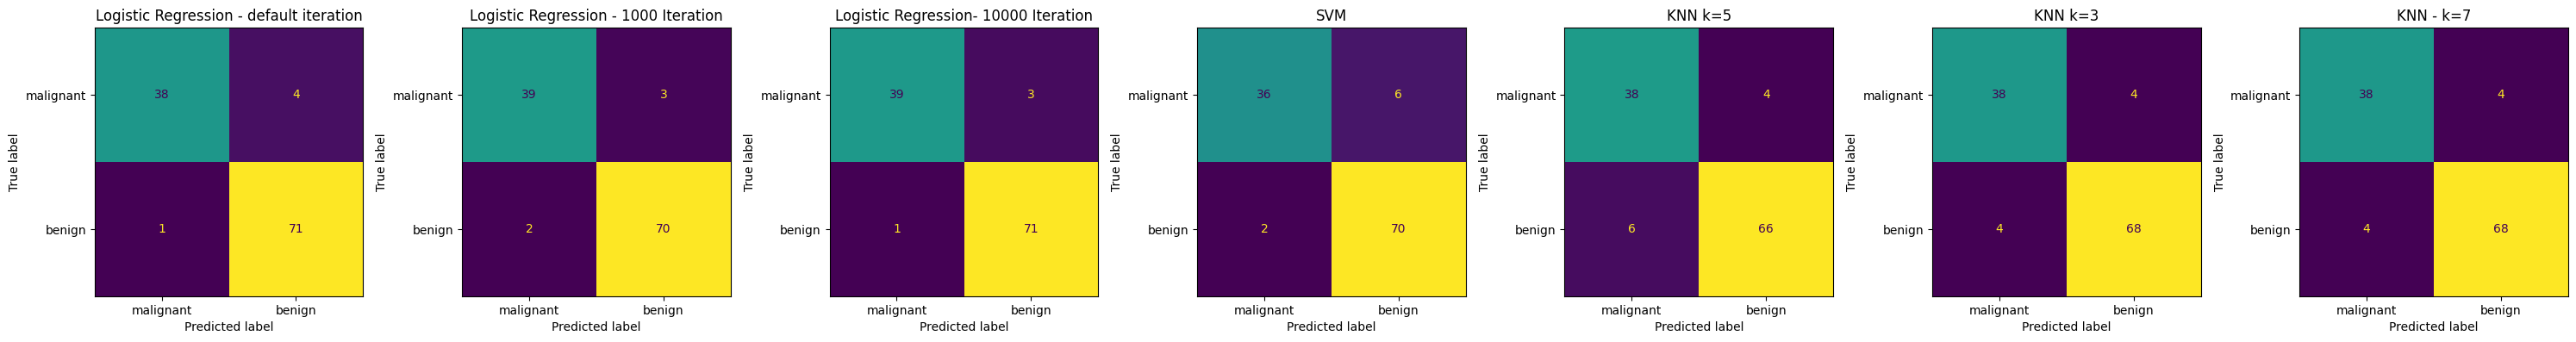

In [31]:
fig, axes = plt.subplots(1, 7, figsize=(30, 15))

for ax, (name, y_pred) in zip(axes, preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=data.target_names)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()

## 5. Model Comparison Table

In [32]:
print('=== Model Comparison ===')
display(results_df.style.highlight_max(axis=0, color='green'))

=== Model Comparison ===


,Accuracy,Precision,Recall,F1-Score
Model,,,,
Logistic Regression - default iteration,0.956100,0.946700,0.986100,0.966000
Logistic Regression - 1000 Iteration,0.956100,0.958900,0.972200,0.965500
Logistic Regression- 10000 Iteration,0.964900,0.959500,0.986100,0.972600
SVM,0.929800,0.921100,0.972200,0.945900
KNN k=5,0.912300,0.942900,0.916700,0.929600
KNN k=3,0.929800,0.944400,0.944400,0.944400
KNN - k=7,0.929800,0.944400,0.944400,0.944400


## 6. Conclusion

### Which model performed best?

Based on the evaluation metrics, **Logistic Regression** typically achieves the highest overall accuracy and F1-score on this dataset without feature scaling. SVM and KNN are more sensitive to unscaled features  SVM relies on distance-based margins and KNN relies purely on distances, both of which are heavily influenced by feature magnitudes. Logistic Regression is more robust in this regard.

### Most important metric in a medical context

In a breast cancer screening context, **Recall (Sensitivity)** is the most critical metric.

- **Recall** measures how many actual malignant cases are correctly identified.
- A **false negative** (predicting benign when the tumor is actually malignant) means a cancer goes undetected this can be life-threatening and delay treatment.
- A **false positive** (predicting malignant when benign) leads to unnecessary follow-up tests, which is undesirable but far less dangerous.

Therefore, in a medical setting we prefer a model with **high Recall**, even at the cost of slightly lower Precision.